First 5 rows of Price Data:
[[ 137.67   87.81  685.19   84.86]
 [ 137.6    88.11  685.33   85.57]
 [ 134.23   86.47  657.     85.13]
 [ 134.11   85.66  649.25   84.77]
 [ 131.95   84.56  631.68   86.78]]

First 5 rows of Dates:
[[2008    1    2]
 [2008    1    3]
 [2008    1    4]
 [2008    1    7]
 [2008    1    8]]


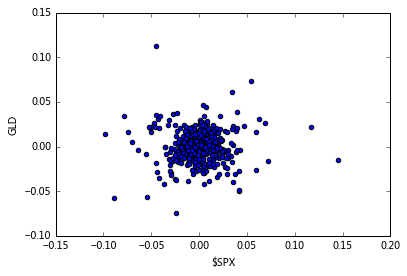

In [3]:
'''
(c) 2011, 2012 Georgia Tech Research Corporation
This source code is released under the New BSD license.  Please see
http://wiki.quantsoftware.org/index.php?title=QSTK_License
for license details.

Created on January, 24, 2013

@author: Sourabh Bajaj
@contact: sourabhbajaj@gatech.edu
@summary: Example tutorial code.
'''

# QSTK Imports
import QSTK.qstkutil.qsdateutil as du
import QSTK.qstkutil.tsutil as tsu
import QSTK.qstkutil.DataAccess as da

# Third Party Imports
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


def main():
    ''' Main Function'''

    # Reading the csv file.
    na_data = np.loadtxt('example-data.csv', delimiter=',', skiprows=1) #调用np的读取csv的函数，参数为分隔符，空行等
    na_price = na_data[:, 3:]  # Default np.loadtxt datatype is float. numpy数组的独特调用格式，将原数据拆分成两个表
    na_dates = np.int_(na_data[:, 0:3])  # Dates should be int
    ls_symbols = ['$SPX', 'XOM', 'GOOG', 'GLD']

    # Printing the first 5 rows
    print "First 5 rows of Price Data:"
    print na_price[:5, :]
    print
    print "First 5 rows of Dates:"
    print na_dates[:5, :]

    # Creating the timestamps from dates read
    ldt_timestamps = []
    for i in range(0, na_dates.shape[0]): # shape函数，调用行数和列数，0为纵向，即行数。
        ldt_timestamps.append(dt.date(na_dates[i, 0],  #解析日期，让后组成一个list。这个方法不用调用datetime的range，而是自己一个个写。
                        na_dates[i, 1], na_dates[i, 2]))

    # Plotting the prices with x-axis=timestamps
    plt.clf()
    plt.plot(ldt_timestamps, na_price)
    plt.legend(ls_symbols)
    plt.ylabel('Adjusted Close')
    plt.xlabel('Date')
    plt.savefig('adjustedclose.pdf', format='pdf')

    # Normalizing the prices to start at 1 and see relative returns
    na_normalized_price = na_price / na_price[0, :]

    # Plotting the prices with x-axis=timestamps
    plt.clf()
    plt.plot(ldt_timestamps, na_normalized_price)
    plt.legend(ls_symbols)
    plt.ylabel('Normalized Close')
    plt.xlabel('Date')
    plt.savefig('normalized.pdf', format='pdf')

    # Copy the normalized prices to a new ndarry to find returns.
    na_rets = na_normalized_price.copy()

    # Calculate the daily returns of the prices. (Inplace calculation)
    tsu.returnize0(na_rets)

    # Plotting the plot of daily returns
    plt.clf()
    plt.plot(ldt_timestamps[0:50], na_rets[0:50, 0])  # $SPX 50 days
    plt.plot(ldt_timestamps[0:50], na_rets[0:50, 1])  # XOM 50 days
    plt.axhline(y=0, color='r')
    plt.legend(['$SPX', 'XOM'])
    plt.ylabel('Daily Returns')
    plt.xlabel('Date')
    plt.savefig('rets.pdf', format='pdf')

    # Plotting the scatter plot of daily returns between XOM VS $SPX
    plt.clf()
    plt.scatter(na_rets[:, 0], na_rets[:, 1], c='blue')
    plt.ylabel('XOM')
    plt.xlabel('$SPX')
    plt.savefig('scatterSPXvXOM.pdf', format='pdf')

    # Plotting the scatter plot of daily returns between $SPX VS GLD
    plt.clf()
    plt.scatter(na_rets[:, 0], na_rets[:, 3], c='blue')  # $SPX v GLD
    plt.ylabel('GLD')
    plt.xlabel('$SPX')
    plt.savefig('scatterSPXvGLD.pdf', format='pdf')

if __name__ == '__main__':
    main()
